In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

### Importing the dataset


In [2]:
data=pd.read_csv("E:\\Documents\\uber.csv")
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
data.shape #To know how many rows and columns does the data have.

(200000, 9)

## EDA

In [4]:
data.describe() #This describes the statistical values of the given data.

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
#Remove 'Unnamed:0' and 'key' column from the dataset
data = data.drop(['Unnamed: 0','key'], axis=1)
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
# To understand the distribution of the target variable (fare amount) and identify any patterns or outliers, we check the correlation.

In [8]:
#First we convert 'pickup_datetime' values to proper datetime to remove any future errors.
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'], errors='coerce')
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [9]:
corr_matrix = data.corr()
corr_matrix['fare_amount'].sort_values(ascending=False)

fare_amount          1.000000
pickup_datetime      0.122769
pickup_longitude     0.010457
passenger_count      0.010150
dropoff_longitude    0.008986
pickup_latitude     -0.008481
dropoff_latitude    -0.011014
Name: fare_amount, dtype: float64

In [10]:
# It looks like the columns 'pickup_longitude', 'passenger_count', 'dropoff_longitude','pickup_latitude','dropoff_latitude' are weakly correlated with the fare_amount.

## Handling missing values

In [11]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
# Since there are missing values in column 'dropoff_longitude' and 'dropoff_latitude', we can remove them since the count is only one.
data_cleaned = data.dropna(subset=['dropoff_longitude'],inplace=True)
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [13]:
data_cleaned = data.dropna(subset=['dropoff_longitude'],inplace=True)
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [14]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [15]:
# All the columns now have non-null values.

## Feature Engineering

In [16]:
# Adding new features in the dataset to enhance the predictive power of our regression model.
# Here we add 'pickup_hour','time_of_day','distance'
# For pickup_hour,extract it from pickup_datetime
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17


In [17]:
#For time_of_day', we divide the categories into Morning, Afternoon, Evening and Night.
def time_of_day(hour):
   if 5 <= hour < 12:
        return 0 #Morning
   elif 12 <= hour < 17:
        return 1 #Afternoon
   elif 17 <= hour < 21:
        return 2 #Evening
   else:
        return 3 #Night

data['time_of_day'] = data['pickup_hour'].apply(time_of_day)
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,time_of_day
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,2
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,2
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,3
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,0
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,2


In [18]:
# Extract the day of the week
# Monday is 0 and Sunday is 6
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek

# Categorize into weekday and weekend
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

print(data.head())

   fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5 2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1          7.7 2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2         12.9 2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3          5.3 2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4         16.0 2014-08-28 17:47:00+00:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  pickup_hour  \
0         -73.999512         40.723217                1           19   
1         -73.994710         40.750325                1           20   
2         -73.962565         40.772647                1           21   
3         -73.965316         40.803349                3            8   
4         -73.973082         40.761247                5           17   

   time_of_day  day_of_week  is_weekend  
0            2            3           0  
1       

In [19]:
#Now since we don't need pickup_datetime column , we can drop it
data = data.drop(['pickup_datetime'], axis=1)
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,time_of_day,day_of_week,is_weekend
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,2,3,0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,2,4,0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,3,0,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,0,4,0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,2,3,0


In [20]:
def calculate_distance(row):
    lat1, lon1 = row['pickup_latitude'], row['pickup_longitude']
    lat2, lon2 = row['dropoff_latitude'], row['dropoff_longitude']
    
    # Convert latitude and longitude differences to kilometers
    lat_diff = (lat2 - lat1) * 111
    lon_diff = (lon2 - lon1) * 111 * np.cos(np.radians(lat1))
    
    # Calculate the straight-line distance
    distance = np.sqrt(lat_diff**2 + lon_diff**2)
    return distance

# Apply the function to each row
data['distance'] = data.apply(calculate_distance, axis=1)
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,time_of_day,day_of_week,is_weekend,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,2,3,0,1.680372
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,2,4,0,2.453282
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,3,0,0,5.028157
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,0,4,0,1.658817
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,2,3,0,4.468076


In [21]:
#Now we remove columns that are no longer in use.
data.drop(columns=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], inplace=True)
data.head()

,fare_amount,passenger_count,pickup_hour,time_of_day,day_of_week,is_weekend,distance
0,7.5,1,19,2,3,0,1.680372
1,7.7,1,20,2,4,0,2.453282
2,12.9,1,21,3,0,0,5.028157
3,5.3,3,8,0,4,0,1.658817
4,16.0,5,17,2,3,0,4.468076


In [22]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
correlation_matrix

,fare_amount,passenger_count,pickup_hour,time_of_day,day_of_week,is_weekend,distance
fare_amount,1.000000,0.010158,-0.021463,0.000203,0.007508,0.000644,0.011056
passenger_count,0.010158,1.000000,0.013187,0.037160,0.033189,0.038950,-0.001678
pickup_hour,-0.021463,0.013187,1.000000,0.300088,-0.086956,-0.091568,-0.003377
time_of_day,0.000203,0.037160,0.300088,1.000000,0.124646,0.129154,-0.000821
day_of_week,0.007508,0.033189,-0.086956,0.124646,1.000000,0.781131,-0.000210
is_weekend,0.000644,0.038950,-0.091568,0.129154,0.781131,1.000000,0.001013
distance,0.011056,-0.001678,-0.003377,-0.000821,-0.000210,0.001013,1.000000


In [24]:
data.describe()

,fare_amount,passenger_count,pickup_hour,time_of_day,day_of_week,is_weekend,distance
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,1.684543,13.491387,1.541048,3.048435,0.283461,25.502484
std,9.901760,1.385995,6.515505,1.144630,1.946946,0.450680,933.552358
min,-52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,9.000000,0.000000,1.000000,0.000000,1.213083
50%,8.500000,1.000000,14.000000,2.000000,3.000000,0.000000,2.117268
75%,12.500000,2.000000,19.000000,3.000000,5.000000,1.000000,3.868344
max,499.000000,208.000000,23.000000,3.000000,6.000000,1.000000,262442.108664


In [25]:
# For fare_amount:
# Minimum: The minimum fare amount is -52. This is clearly an outlier, as fare amounts should not be negative.
# Maximum: The maximum fare amount is 499, which is significantly higher than the 75th percentile (12.5). This suggests that there are some extremely high fare amounts.

#For passenger_count:
#Maximum: The maximum passenger count is 208, which is extremely high and unrealistic, given that typical passenger vehicles can't accommodate this many passengers. This is an outlier.

#For distance:
#Standard Deviation: The standard deviation is 933.55, which is very high, indicating large variability.

## Handling outliers

In [26]:
# Remove fare amounts that are clearly outliers (e.g., negative fares or extremely high values)
data = data[(data['fare_amount'] > 0) & (data['fare_amount'] < 100)]


In [27]:
# Remove unrealistic passenger counts (e.g., 0 or very high values)
data = data[(data['passenger_count'] > 0) & (data['passenger_count'] <= 6)]

In [28]:
# Remove unrealistic distances (e.g., very high values)
data = data[data['distance'] < 100]

In [30]:
#Again checking for coorelation
corr_matrix = data.corr()
corr_matrix["fare_amount"].sort_values(ascending=False)

fare_amount        1.000000
distance           0.830507
passenger_count    0.012481
day_of_week        0.005709
is_weekend        -0.000525
time_of_day       -0.001250
pickup_hour       -0.020978
Name: fare_amount, dtype: float64

In [ ]:
#Now we get that distance and fare_amount are strongly correlated.Other features, while not showing strong linear relationships, might still hold predictive power when combined in non-linear models or when interactions between features are considered.

## Split the Dataset

In [31]:
# Move the target variable to the end of the DataFrame
target_col = 'fare_amount'
feature_cols = [col for col in data.columns if col != target_col]
data_rearranged = data[feature_cols + [target_col]]
data_rearranged.head()

,passenger_count,pickup_hour,time_of_day,day_of_week,is_weekend,distance,fare_amount
0,1,19,2,3,0,1.680372,7.5
1,1,20,2,4,0,2.453282,7.7
2,1,21,3,0,0,5.028157,12.9
3,3,8,0,4,0,1.658817,5.3
4,5,17,2,3,0,4.468076,16.0


In [32]:
# Features and target variable
X = data_rearranged[feature_cols]
y = data_rearranged[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Data Scaling/Normalization

In [42]:
min_max_scaler = MinMaxScaler()
# Fit and transform the data
X_normalized = min_max_scaler.fit_transform(X)

In [44]:
# Convert back to DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=feature_cols)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

## Correlation Analysis

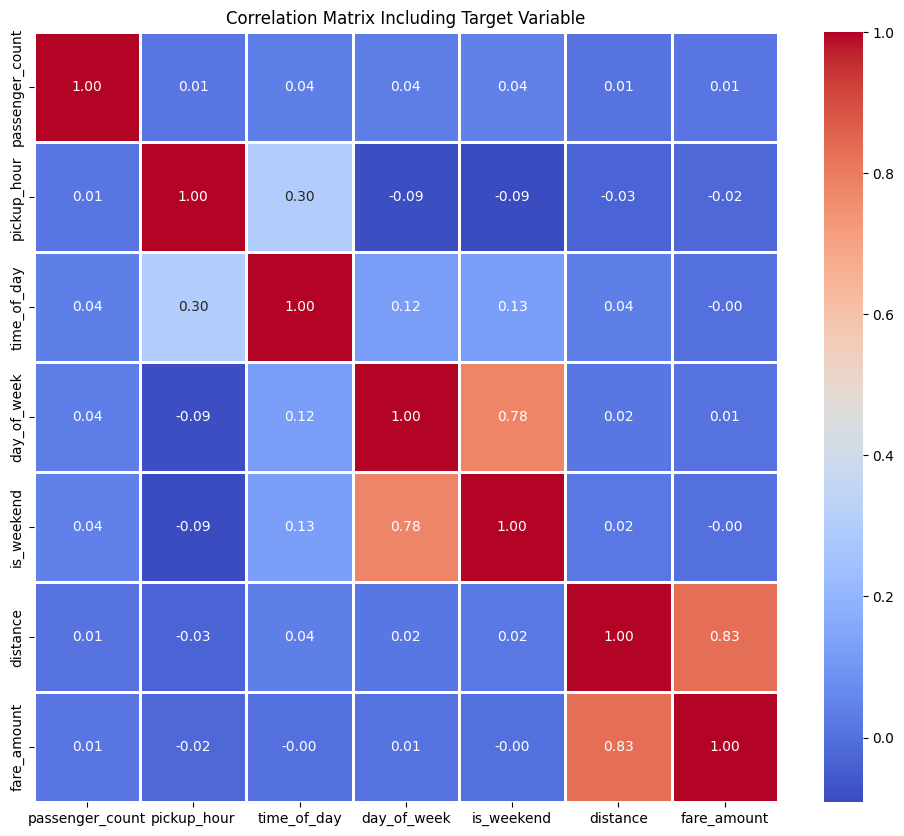

In [49]:
# Combine normalized features with the target column
data_normalized = pd.concat([X_normalized, y.reset_index(drop=True)], axis=1)
# Rename columns for clarity
data_normalized.columns = feature_cols + [target_col]

# Compute the correlation matrix
correlation_matrix = data_normalized.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm' ,fmt='.2f', linewidths=0.9)
plt.title('Correlation Matrix Including Target Variable')
plt.show()

#### So,A correlation coefficient of 0.85 between distance and fare_amount indicates a strong positive relationship between these two variables. 
#### This suggests that as the distance increases, the fare amount tends to increase as well. 